In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import tikzplotlib
from sklearn.mixture import GaussianMixture

sns.set_theme()

In [42]:
np.random.seed(1)

N = 100

mus =  np.array([[-0.5], [1.5]])
sigmas = np.array([[1.0], [0.8]]) ** 2
gmm = GaussianMixture(2)
gaus_samples_1 = np.random.normal(mus[0], sigmas[0], 100).reshape(-1,1)
gaus_samples_2 = np.random.normal(mus[1], sigmas[1], 100).reshape(-1,1)
fit_samples = np.concatenate((gaus_samples_1, gaus_samples_2))
gmm.fit(fit_samples)

mus2 =  np.array([[-0.5], [1.5]])
sigmas2 = np.array([[1.0], [0.8]]) ** 2
gmm2 = GaussianMixture(2)
gaus_samples_1 = 4.5 - gaus_samples_1
gaus_samples_2 = 4.5 - gaus_samples_2
gaus_samples_1 = gaus_samples_1 + 0.3*np.random.normal(size=gaus_samples_1.shape)
gaus_samples_2 = gaus_samples_2 + 0.3*np.random.normal(size=gaus_samples_2.shape)
fit_samples = np.concatenate((gaus_samples_1, gaus_samples_2))
gmm2.fit(fit_samples)

GaussianMixture(n_components=2)

0.98999695487101
0.9899913897948702


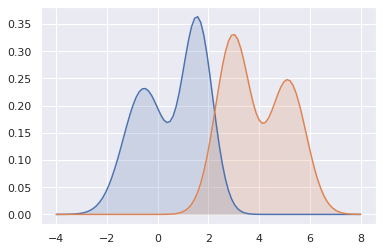

In [43]:
x = np.linspace(-4, 8, N).reshape(-1, 1)
logp1 = gmm.score_samples(x)
logp2 = gmm2.score_samples(x)

print(np.sum(np.exp(logp1))*(12/N))
print(np.sum(np.exp(logp2))*(12/N))

plt.plot(x, np.exp(logp1))
plt.fill_between(x.reshape(-1), np.exp(logp1), alpha=0.2)
plt.plot(x, np.exp(logp2))
plt.fill_between(x.reshape(-1), np.exp(logp2), alpha=0.2)


#tikzplotlib.save("figure.tex", wrap=False) # wrap controls the standaloneness of the tex figure

out = np.concatenate((x, np.exp(logp1).reshape(-1,1), np.exp(logp2).reshape(-1,1)), axis=1)
np.savetxt('base_dist.csv', out, delimiter=',', header='x,logp_x1,logp_x2', comments='')

(100,) (100,)
0.9900000238166711
0.9899996914606853


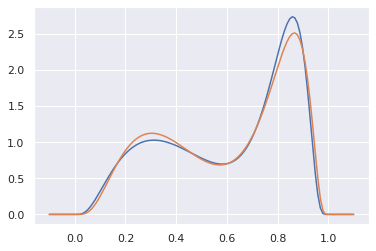

In [44]:
z = np.linspace(0.001, 0.999, N)
x1 = np.log(z) - np.log(1-z)
x2 = 4.5-(np.log(z) - np.log(1-z))
logp_z1 = gmm.score_samples(x1.reshape(-1, 1)).reshape(-1) + np.abs(np.log(1/z + 1/(1-z)))
logp_z2 = gmm2.score_samples(x2.reshape(-1, 1)).reshape(-1) + np.abs(np.log(1/z + 1/(1-z)))

print(z.shape, logp_z1.shape)

z_prev = np.linspace(-0.1, 0.001, N)
zeros_prev = np.zeros(N)

z_after = np.linspace(0.999, 1.1, N)
zeros_after = np.zeros(N)

z = np.concatenate([z_prev, z, z_after], axis=0)
p1 = np.concatenate([zeros_prev, np.exp(logp_z1), zeros_after], axis=0)
p2 = np.concatenate([zeros_prev, np.exp(logp_z2), zeros_after], axis=0)

plt.plot(z, p1) #np.exp(logp_z1))
plt.plot(z, p2) #np.exp(logp_z2))

out = np.concatenate((z.reshape(-1,1), p1.reshape(-1,1), p2.reshape(-1,1)), axis=1)
np.savetxt('latent_dist.csv', out, delimiter=',', header='z,logp_z1,logp_z2', comments='')

#plt.plot(z, np.exp(logp_z1) - np.exp(logp_z2))

print(np.sum(np.exp(logp_z1)) * 0.998/N)
print(np.sum(np.exp(logp_z2)) * 0.998/N)

#z1 = x
#z2 = x

#logp_z1 = logp1
#logp_z2 = gmm2.score_samples(4.5 - x)

#plt.plot(z1, np.exp(logp_z1))
#plt.plot(z2, np.exp(logp_z2))